# Regresión logística para predicciones bancarias

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("F:/BD/GitHub/mlearningcourse/datasets/bank/bank.csv", sep=';')
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [ ]:
# Se utilizará la 'y', para predecir ('y' significa si compró o no)

In [29]:
# Convertir los YES en 1, y los NO en 0
data['y'] = (data['y']=='yes').astype(int)

In [34]:
# Dataframe convertido
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [33]:
#Extraer los únicos de educación
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [38]:
# Reemplazar las categorias por categorías mejor escritas
data['education'] = np.where(data['education'] =='basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] =='basic.9y', 'Basic', data['education'])

data['education'] = np.where(data['education'] =='high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] =='professional.course', 'Professional', data['education'])
data['education'] = np.where(data['education'] =='university.degree', 'University Degree', data['education'])

data['education'] = np.where(data['education'] =='illiterate', 'Illiterate', data['education'])
data['education'] = np.where(data['education'] =='unknown', 'Unknown', data['education'])

In [39]:
# Nuevo dataset con reemplazos
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional',
       'Unknown', 'Illiterate'], dtype=object)

In [40]:
#Cuenta de valores por Si y No en dataset
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [41]:
#Promedios de la variable de decisión
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [49]:
#Promedios de la variable de nivel de estudios
ed = data.groupby('education').mean()
ed.sort_values('age', ascending = False)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320


In [53]:
pd.crosstab(data.education, data.y)

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional,470,65
University Degree,1099,165
Unknown,141,26


Text(0, 0.5, 'Frecuencia compra')

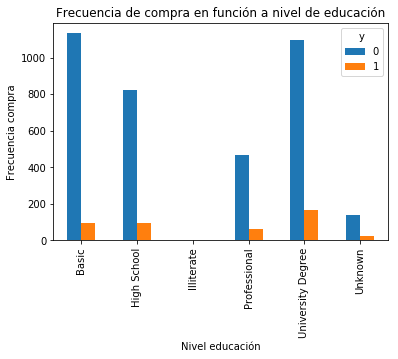

In [52]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = 'bar')
plt.title('Frecuencia de compra en función a nivel de educación')
plt.xlabel('Nivel educación')
plt.ylabel('Frecuencia compra')

In [58]:
pd.crosstab(data.marital, data.y)

y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


In [63]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float),axis = 0) # Porcentajes por total de cada fila

y,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


Text(0, 0.5, 'Proporción clientes')

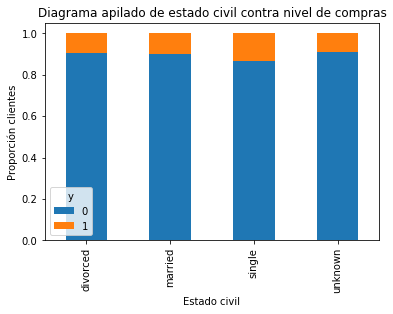

In [64]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True) #Barras apiladas
plt.title('Diagrama apilado de estado civil contra nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción clientes')

Text(0, 0.5, 'Frecuencia compra')

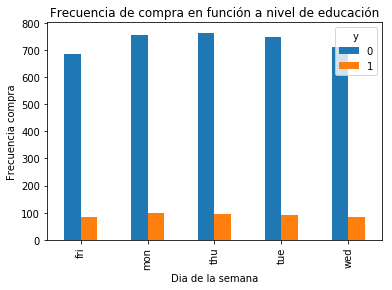

In [66]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind = 'bar')
plt.title('Frecuencia de compra en función a nivel de educación')
plt.xlabel('Dia de la semana')
plt.ylabel('Frecuencia compra')

Text(0, 0.5, 'Frecuencia compra')

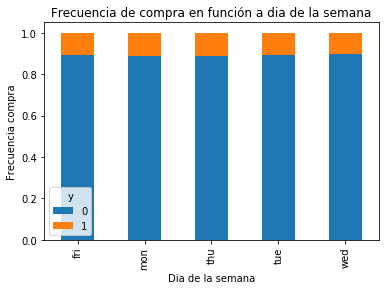

In [71]:
%matplotlib inline
table1= pd.crosstab(data.day_of_week, data.y)
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Frecuencia de compra en función a dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Frecuencia compra')

Text(0, 0.5, 'Frecuencia compra')

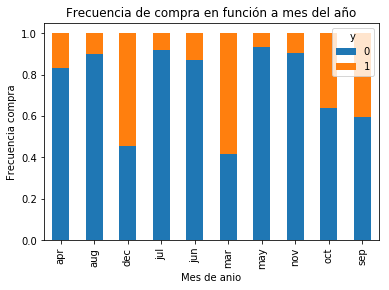

In [72]:
%matplotlib inline
table1= pd.crosstab(data.month, data.y)
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Frecuencia de compra en función a mes del año')
plt.xlabel('Mes de anio')
plt.ylabel('Frecuencia compra')

Text(0, 0.5, 'Frecuencia compra')

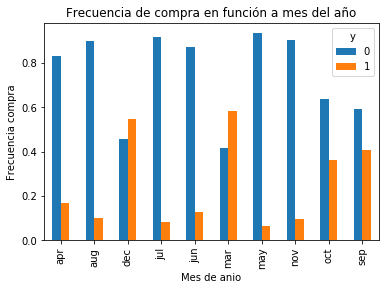

In [73]:
%matplotlib inline
table1= pd.crosstab(data.month, data.y)
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Frecuencia de compra en función a mes del año')
plt.xlabel('Mes de anio')
plt.ylabel('Frecuencia compra')

Text(0.5, 1.0, 'Histograma de edad')

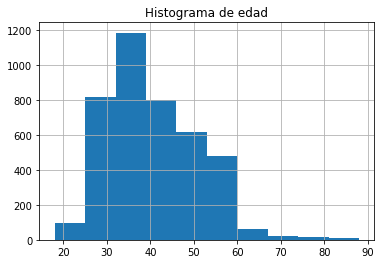

In [84]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de edad")

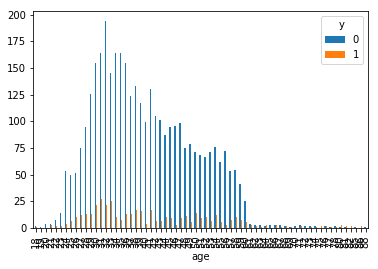

In [86]:
pd.crosstab(data.age
                    , data.y).plot(kind = 'bar')

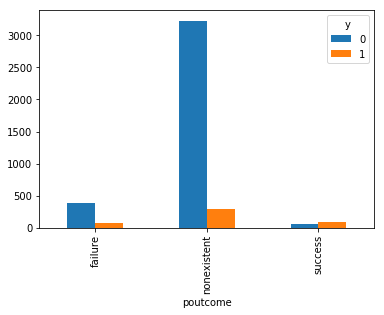

In [88]:
pd.crosstab(data.poutcome
                    , data.y).plot(kind = 'bar')